In [ ]:
# https://atcold.github.io/pytorch-Deep-Learning/
# https://d2l.ai/
# http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/


In [90]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json


# 1. Intro to Pytorch

## Tabeluar data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
    

In [2]:
df_wine = pd.read_csv('./data/winequality-white.csv', sep=';')


In [3]:
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_wine.shape

(4898, 12)

In [6]:
wine = torch.from_numpy(df_wine.values)


In [7]:
wine.size(), wine.type()


(torch.Size([4898, 12]), 'torch.DoubleTensor')

In [8]:
data = wine[:, :-1]
target = wine[:, -1]

data.size(), target.size(), target[:5]


(torch.Size([4898, 11]),
 torch.Size([4898]),
 tensor([6., 6., 6., 6., 6.], dtype=torch.float64))

In [9]:
target


tensor([6., 6., 6.,  ..., 6., 7., 6.], dtype=torch.float64)

In [10]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1).long(), 1.0)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [11]:
target_onehot[0]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
torch.mean(data, dim=0)


tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01],
       dtype=torch.float64)

In [13]:
torch.var(data, dim=0)

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00],
       dtype=torch.float64)

In [14]:
bad_wine = target.le(3)
mid_wine = target.gt(3) & target.le(7)
good_wine = target.gt(7)


In [15]:
bad_mean = data[bad_wine].mean(dim=0)
mid_mean = data[mid_wine].mean(dim=0)
good_mean = data[good_wine].mean(dim=0)

col_names = df_wine.columns[df_wine.columns!='quality']
for name, bad_v, mid_v, good_v in zip(col_names, bad_mean, mid_mean, good_mean):
    print(name, bad_v.item(), mid_v.item(), good_v.item())


fixed acidity 7.6 6.858375904640272 6.678333333333333
volatile acidity 0.33325000000000005 0.27801724137931033 0.2779722222222222
citric acid 0.336 0.334414644529587 0.32816666666666666
residual sugar 6.3925 6.420647083865475 5.628333333333334
chlorides 0.0543 0.04603341847594722 0.03801111111111112
free sulfur dioxide 53.325 35.180821626223924 36.62777777777778
total sulfur dioxide 170.6 138.7014687100894 125.88333333333334
density 0.9948840000000001 0.9940931928480202 0.9922143888888889
pH 3.1875 3.1870093656875267 3.2211666666666665
sulphates 0.4744999999999999 0.4900723712217964 0.48566666666666675
alcohol 10.345 10.471430395913154 11.651111111111113


In [16]:
# There are 500 more good wines than your threshold predicted, so total sulfur dioxide 
predicted_index = (data[:, 6] < 141.83)
actual_index = target > 5

predicted_index.sum(), actual_index.sum()


(tensor(2727), tensor(3258))

In [17]:
n_matches = (predicted_index & actual_index).sum().item()


In [18]:
n_matches, n_matches / predicted_index.sum().item(), n_matches / actual_index.sum().item()


(2018, 0.74000733406674, 0.6193984039287906)

## Text data

In [ ]:
!wget http://www.gutenberg.org/files/1342/1342-0.txt -P data
    

In [19]:

with open('./data/1342-0.txt', encoding='utf8') as f:
    text = f.read()

corpus = list(filter(lambda x: len(x) > 0, text.split('\n')))



In [20]:
def clean_text(text):
    punctuation = '.,;:"!?”“_-'

    words = text.lower().strip().replace('\n', ' ').split()
    
    return [ w.strip(punctuation) for w in words ]


### Character-level one-hot

In [21]:
line = corpus[200].strip()

line = '“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

cleaned_line = ''.join(clean_text(line))

cleaned_line, len(cleaned_line)

('impossiblemrbennetimpossiblewheniamnotacquaintedwithhim', 55)

In [22]:
letter_tensor = torch.zeros(len(cleaned_line), 128)

letter_tensor.shape


torch.Size([55, 128])

In [23]:
for i, letter in enumerate(cleaned_line):
    idx = ord(letter) if ord(letter) < 128 else 0
    letter_tensor[i][idx] = 1

letter_tensor


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### Word-level one-hot

In [24]:
words = clean_text(text)

vocabulary = set(words)

word2idx = {w: idx for idx, w in enumerate(vocabulary)}

len(vocabulary), word2idx['impossible']


(7265, 3924)

In [25]:
words_in_line = clean_text(line)

word_vector = torch.zeros(len(words_in_line), len(vocabulary))

for idx, w in enumerate(words_in_line):
    j = word2idx[w]
    word_vector[idx][j] = 1
    print(idx, j, w)

word_vector.shape


0 3924 impossible
1 624 mr
2 2439 bennet
3 3924 impossible
4 1802 when
5 1142 i
6 6122 am
7 4968 not
8 2580 acquainted
9 4226 with
10 923 him


torch.Size([11, 7265])

# 2. Linear Regression Pytorch

In [26]:


y = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

x= torch.tensor(x)
y = torch.tensor(y)


In [27]:
def model(w, b, x):
    return w * x + b

def loss_fn(y_true, y_pred):
    ''' means squared error'''
    return ((y_true - y_pred)**2).mean()


In [28]:
w = torch.ones(1)
b = torch.zeros(1)

y_pred = model(w, b, x)

loss_fn(y, y_pred)



tensor(1763.8848)

In [29]:
def loss_dw(y_true, y_pred):
    return y_pred - y_true

def model_dw(x):
    return x

def model_db():
    return 1

def grad_w(x, y_true,  y_pred):
    return ((y_pred - y_true) * x).mean()

def grad_b(y_true,  y_pred):
    return (y_pred - y_true).mean()

def grad_param(x, y_true, y_pred):
    dw = grad_w(x, y_true,  y_pred)
    db = grad_b(y_true,  y_pred)

    return torch.stack([dw, db])



In [30]:
lr = 0.01
epoches = 5000

def training(x, y, params, epoches, lr):
    for epoch in range(epoches):
        w, b = params

        y_pred = model(w, b, x)
        loss = loss_fn(y, y_pred)
        grad = grad_param(x, y, y_pred)

        params = params - lr * grad
        
        if epoch % 1000 == 0:
            print('epoch: ', epoch, 'loss: ', loss.item())
            print('[w, b]:', params.numpy())
    return params

params = training(x*0.1, y, torch.tensor([1., 0.]), epoches, lr)


epoch:  0 loss:  80.36434173583984
[w, b]: [1.3880701 0.0532   ]
epoch:  1000 loss:  7.846929550170898
[w, b]: [ 4.044966 -9.816922]
epoch:  2000 loss:  3.8267829418182373
[w, b]: [  4.802209 -14.103535]
epoch:  3000 loss:  3.091984748840332
[w, b]: [  5.12595  -15.936173]
epoch:  4000 loss:  2.9576845169067383
[w, b]: [  5.264355 -16.719664]


In [31]:
params


tensor([  5.3235, -17.0544])

In [32]:
y_pred = model(*params, x*0.1)

y_pred


tensor([ 1.9504, 12.7039, 13.9283, 26.5450, 12.9168,  8.9775,  0.9922, -5.4492,
         8.7113, 15.0995, 19.3583])

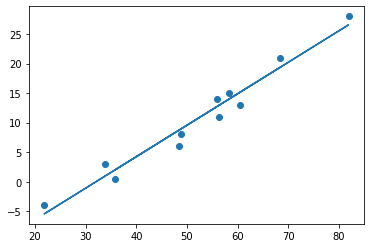

In [33]:
plt.plot(x.numpy(), y_pred.numpy())
plt.scatter(x.numpy(), y.numpy())


# 3. MNIST Classifier Pytorch

In [34]:
df_images = pd.read_csv('./data/train.csv')

df_images.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_images.shape


(1000, 785)

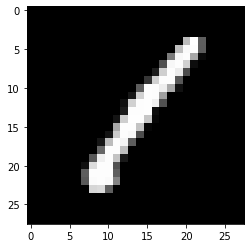

In [36]:
plt.imshow(df_images.iloc[0, 1:].values.reshape(28, 28), cmap=plt.get_cmap('gray'))


## Load Dataset

In [37]:
def load_data(filename):
    df_images = pd.read_csv(filename)

    X = df_images.drop('label', axis=1)
    y = df_images['label']

    X = X.values.reshape(len(X), 1, 28, 28)
    y = y.values
    
    X = torch.tensor(X).float()
    y = torch.tensor(y)

    return X, y


## Training

In [38]:
import torch
from torch import nn, optim
import torch.nn.functional as F

class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 10)
        
        self.dropout = nn.Dropout(p=.2)
        
    def forward(self, inputs):
        x = inputs.view(inputs.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x        


In [39]:
model = MNISTClassifier()
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

model


MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (fc4): Linear(in_features=98, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [40]:
def training(X, y, model, epoches, loss_fn, optimizer):
    for epoch in range(epoches):
        y_pred = model(X)
        loss_train = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print('Epoch [%d/%d]: Loss: %.4f' % (epoch+1, epoches, loss_train.item()))


In [41]:
X_train, y_train = load_data('./data/train.csv')

training(
    X_train, y_train, 
    model=model, 
    epoches=50, 
    loss_fn=loss_fn, 
    optimizer=optimizer
)

Epoch [1/50]: Loss: 4.7718
Epoch [11/50]: Loss: 0.7783
Epoch [21/50]: Loss: 0.2212
Epoch [31/50]: Loss: 0.0518
Epoch [41/50]: Loss: 0.0126


## Prediction

In [42]:
X_test, y_test = load_data('./data/test.csv')


In [43]:
y_test_pred = model(X_test)

_, y_test_pred_idx = torch.max(y_test_pred, dim=1)

len([ 1 for y_pred, y_true in zip(y_test_pred_idx, y_test) if y_pred == y_true ]) / len(y_test)


0.885

# 4. CBOW Pytorch



In [44]:
import torch
import torch.nn as nn


In [45]:
text = """How that personage haunted my dreams, I need scarcely tell you. On
stormy nights, when the wind shook the four corners of the house and
the surf roared along the cove and up the cliffs, I would see him in a
thousand forms, and with a thousand diabolical expressions. Now the leg
would be cut off at the knee, now at the hip, now he was a monstrous
kind of a creature who had never had but the one leg, and that in the
middle of his body. To see him leap and run and pursue me over hedge and
ditch was the worst of nightmares. And altogether I paid pretty dear for
my monthly fourpenny piece, in the shape of these abominable fancies"""

tokens = text.replace(',','').replace('.','').lower().split()


In [46]:

def build_word_id_mapping(corpus):
    vocabulary = set(corpus)
    voc_size = len(vocabulary)
    
    word_dict = {}
    inverse_word_dict = {}

    for i, word in enumerate(vocabulary):
        word_dict[word] = i
        inverse_word_dict[i] = word

    return voc_size, word_dict, inverse_word_dict


def get_context_idx(context, word_dict):
    '''
    context: ['a', 'b', 'c']
    '''
    idx = [ word_dict[w] for w in context ]

    return torch.tensor(idx, dtype=torch.long)


In [47]:
def build_context_target(text, win_size = 2):
    data = []

    for i in range(win_size, len(text) - win_size):
        context = [
            text[i-2], text[i-1],
            text[i+1], text[i+2],
        ]
        
        target=text[i]
    
        data.append((context, target))

    return data


In [48]:
class CBow(nn.Module):
    def __init__(self, v_size, embedding_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(v_size, embedding_size)
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, v_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, inputs):
        embedding = sum(self.embedding(inputs)).view(1, -1) # (1, E)
        out = self.fc1(embedding)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out


In [49]:

def training(model, data, v_size, word_dict):
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_fn = nn.NLLLoss()
    epoches = 100

    for epoch in range(epoches):
        epoch_loss = 0
        for context, target in data:
            context_ids = get_context_idx(context, word_dict)

            log_probs = model(context_ids)
            loss = loss_fn(log_probs, torch.tensor([word_dict[target]], dtype=torch.long))

            model.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        if epoch == 0 or (epoch + 1) % 10 == 0:
            print('Epoch %d/%d, Train Loss: %4.f' % (epoch + 1, epoches, epoch_loss))


In [50]:
v_size, word_dict, inverse_word_dict = build_word_id_mapping(tokens)

data = build_context_target(tokens)

model = CBow(v_size, 20, 64)

training(model, data, v_size, word_dict)


Epoch 1/100, Train Loss:  532
Epoch 10/100, Train Loss:  176
Epoch 20/100, Train Loss:   26
Epoch 30/100, Train Loss:    9
Epoch 40/100, Train Loss:    5
Epoch 50/100, Train Loss:    3
Epoch 60/100, Train Loss:    3
Epoch 70/100, Train Loss:    2
Epoch 80/100, Train Loss:    2
Epoch 90/100, Train Loss:    1
Epoch 100/100, Train Loss:    1


In [51]:
model.embedding( torch.tensor( [ word_dict['leap'] ], dtype=torch.long ) )


tensor([[-0.4131,  1.7616, -0.6311,  1.3714,  0.8231, -0.3679, -0.3469,  0.4156,
         -1.1271,  1.6484, -0.0486, -1.6873,  0.4396, -0.7184, -0.9546,  0.0995,
         -0.7428, -0.2030,  1.2041, -0.7599]], grad_fn=<EmbeddingBackward>)

In [52]:
def find_similarity(
    embedding,
    word_dict, inverse_word_dict, v_size, 
    word, top_n
):
    v_w1 = embedding( torch.tensor( [ word_dict[word] ], dtype=torch.long ) ).detach().numpy()

    word_sim = {}
    for i in range(v_size):
        v_w2 = embedding(torch.tensor(i)).detach().numpy()
        theta = np.dot(v_w1, v_w2) / (np.linalg.norm(v_w1) * np.linalg.norm(v_w2))
        word = inverse_word_dict[i]
        word_sim[word] = theta

    words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)

    for word, sim in words_sorted[:top_n]:
        print(word, sim)


In [53]:
find_similarity(
    model.embedding, word_dict, inverse_word_dict, v_size,
    'pretty', 5
)

pretty [0.99999994]
altogether [0.68747884]
my [0.62062633]
how [0.45483753]
that [0.40294233]


In [54]:
word_dict.keys()

dict_keys(['run', 'at', 'house', 'abominable', 'but', 'corners', 'stormy', 'over', 'and', 'thousand', 'paid', 'of', 'ditch', 'pretty', 'pursue', 'fancies', 'cliffs', 'to', 'four', 'now', 'the', 'cut', 'roared', 'me', 'wind', 'need', 'creature', 'these', 'a', 'surf', 'my', 'shape', 'how', 'monthly', 'shook', 'when', 'dreams', 'that', 'cove', 'tell', 'had', 'haunted', 'kind', 'worst', 'see', 'off', 'hedge', 'monstrous', 'middle', 'scarcely', 'piece', 'i', 'his', 'on', 'who', 'for', 'be', 'up', 'him', 'hip', 'personage', 'expressions', 'in', 'leap', 'leg', 'you', 'he', 'was', 'diabolical', 'nightmares', 'nights', 'forms', 'one', 'along', 'never', 'with', 'would', 'altogether', 'fourpenny', 'dear', 'knee', 'body'])

## 5. RNN

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip -P data
    
!unzip './data/sentiment labelled sentences.zip' -d data


In [243]:
with open("./data/sentiment.txt") as f:
    reviews = f.read()

data = pd.DataFrame([ 
    review.split('\t') for review in reviews.split('\n') ],
    columns=['review', 'label']
)


In [244]:
data.head()


,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [245]:
data.shape

(3000, 2)

In [253]:
import string, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words_en = stopwords.words('english')

def load_data():
    with open("./data/sentiment.txt") as f:
        reviews = f.read()

    data = pd.DataFrame([ 
      review.split('\t') for review in reviews.split('\n') ],
      columns=['review', 'label']
    )

    return data

def clen_sentence(text):
    '''
    extract useful tokens from a sentence
    '''
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    # remove stopping words
    tokens = [ w for w in tokens if w not in stop_words_en ]
    tokens = [ w for w in tokens if len(w) > 1 ]
    
    # return tokens
    return ' '.join(tokens)

def build_vocabulary(corpus):
    '''
    tokens: a list of tokens of the corpus

    build_vocabulary(['work', 'eat', 'school', 'read', 'cat', 'eat'])
    '''
    
    tokens = [ w for line in corpus for w in line ]
    vocab = set(tokens)

    word_id = {}
    inverse_word_id = {}
    for i, word in enumerate(vocab):
        word_id[word] = i+1
        inverse_word_id[i+1] = word

    pad_char = '*'
    word_id[pad_char] = 0
    inverse_word_id[0] = pad_char
    vocab.add(pad_char)

    return vocab, word_id, inverse_word_id

def pad_text(text, seq_len, pad_str):
    '''
    RNN takes a fixed length of sequence
    '''

    review = None
    text_size = len(text)

    if text_size >= seq_len:
        review = text[:seq_len]
    else:
        review = [pad_str] * (seq_len - text_size) + text
    
    return review



In [272]:
def clean_df(data):
    data['cleaned_review'] = [ clen_sentence(review) for review in data['review'].values ]

    data['word_len'] = [ len(x.split()) for x in data['cleaned_review'] ]
    data = data[data['word_len'] > 1]
    
    print('max len: ', data['word_len'].max())
    print('min len: ', data['word_len'].min())
    print('mean len: ', data['word_len'].mean())

    corpus = [ x.split() for x in data['cleaned_review'] ]
    label = data['label'].values.astype(int)
    
    return corpus, label

def text_preprocess(seq_len=40):
    df = load_data()
    corpus, label = clean_df(df)
    vocab, word_id, inverse_word_id = build_vocabulary(corpus)

    padding_corpus = [ pad_text(text, seq_len, inverse_word_id[0]) for text in corpus ]
    encoded_corpus = np.array([ [ word_id[t] for t in sent ] for sent in padding_corpus ])

    # save
    np.savetxt(
        "data/cleaned_review.csv", 
        np.concatenate((encoded_corpus, label[:, np.newaxis]), axis=1), 
        fmt='%d',
        delimiter=","
    )
    

    with open('data/word_id.json', 'w') as f:
        json.dump(word_id, f)


In [273]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from torch import optim


In [274]:

def build_data_loader(X, y, batch_size):
    '''
    TensorDataset is a subclass of Dataset, 
    as long as the tensor is passed in, it is indexed by the first dimension.
    '''
    total_len = len(X)
    train_cutoff = int(0.7 * total_len)
    valid_cutoff = int(0.8 * total_len)

    rand_idx = torch.randperm(total_len)
    train_index = rand_idx[:train_cutoff]
    valid_index = rand_idx[train_cutoff:valid_cutoff]
    test_index = rand_idx[valid_cutoff:]

    
    X_train, y_train = torch.Tensor(X[train_index]).long(), torch.Tensor(y[train_index]).float()
    X_valid, y_valid = torch.Tensor(X[valid_index]).long(), torch.Tensor(y[valid_index]).float()
    X_test, y_test = torch.Tensor(X[test_index]).long(), torch.Tensor(y[test_index]).float()
    
    train_data = TensorDataset(X_train, y_train)
    valid_data = TensorDataset(X_valid, y_valid)
    test_data = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_data, batch_size, shuffle=True)
    valid_loader = DataLoader(valid_data, batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size, shuffle=True)
    
    return train_loader, valid_loader, test_loader


In [275]:

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, n_layers, output_dim):
        super().__init__()
        
        self.vocab_size = vocab_size  
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers 

        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(
            embed_dim, hidden_dim, 
            n_layers, batch_first=True, 
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, inputs):
        # Embedding: (batch_size, seq_n, D)
        embed_words = self.embedding(inputs)

        # out: (batch_size, seq_n, H)
        out, h = self.lstm(embed_words)
        out = out.contiguous().view(-1, hidden_dim)
  
        # fc_out: (batch_size*seq_n, 1)
        fc_out = self.fc(out)
        fc_out = torch.sigmoid(fc_out)
        # fc_out: (batch_size, seq_n)
        fc_out = fc_out.view(embed_words.shape[0], -1) 

        # fc_out: (batch_size, 1)
        sigmoid_last = fc_out[:, -2:-1].squeeze(dim=1)


        return sigmoid_last, h


In [276]:
def training():
    prev_valid_loss = 99999

    for epoch in range(epoches):
        model.train()
        for inputs, t_label in train_loader:
            out, h = model(inputs)

            # .squeeze() => dimensions of 1 removed
            loss = loss_fn(out, t_label)

            model.zero_grad()
            loss.backward()
            optimizer.step()

             
        model.eval()
        valid_loss = []
        for inputs, v_label in valid_loader:
            v_out, v_h = model(inputs)
            v_loss = loss_fn(v_out, v_label)
            valid_loss.append(v_loss.item())

        mean_valid_loss = np.mean(valid_loss)
        print('Epoch %d, train loss: %.4f, valid loss: %.4f' % (epoch, loss.item(), mean_valid_loss))
        
        # early stopping
#         if mean_valid_loss > prev_valid_loss:
#             break
#         else:
#             prev_valid_loss = mean_valid_loss


In [280]:
# step 1
text_preprocess()

cleaned_df = pd.read_csv('data/cleaned_review.csv', header=None)
with open('data/word_id.json') as f:
    word_id = json.load(f)


encoded_corpus = cleaned_df.iloc[:, :-1].values
label = cleaned_df.iloc[:, -1].values

print('vocab size, ', len(word_id))
print(encoded_corpus.shape, label.shape)

# step 2
parameters = {
  'vocab_size': len(word_id),
  'embed_dim': 30,
  'hidden_dim': 100,
  'n_layers': 1,
  'output_dim': 1
}

model = SentimentLSTM(**parameters)
print(model)
for n, p in model.named_parameters():
    print(n, p.shape)

# step 3
train_loader, valid_loader, test_loader = build_data_loader(encoded_corpus, label, batch_size=1)

# step 4
epoches = 3
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

training()


max len:  41
min len:  2
mean len:  6.35348997926745
vocab size,  5251
(2894, 40) (2894,)
SentimentLSTM(
  (embedding): Embedding(5251, 30)
  (lstm): LSTM(30, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)
embedding.weight torch.Size([5251, 30])
lstm.weight_ih_l0 torch.Size([400, 30])
lstm.weight_hh_l0 torch.Size([400, 100])
lstm.bias_ih_l0 torch.Size([400])
lstm.bias_hh_l0 torch.Size([400])
fc.weight torch.Size([1, 100])
fc.bias torch.Size([1])
Epoch 0, train loss: 1.2273, valid loss: 0.6587
Epoch 1, train loss: 1.1266, valid loss: 0.6344
Epoch 2, train loss: 0.4216, valid loss: 0.6510


In [281]:
torch.save(model.state_dict(), 'model.pkl')


In [282]:
def test():
    model = SentimentLSTM(**parameters)
    model.load_state_dict(torch.load('model.pkl'))
    
    model.eval()
    test_loss = []
    toal_correct=0
    for inputs, v_label in test_loader:
        v_out, v_h = model(inputs)        
        v_loss = loss_fn(v_out, v_label)
        
        test_loss.append(v_loss.item())        

        pred_label = torch.round(v_out)
        batch_correct = pred_label.eq(v_label.view_as(pred_label)).sum()
        toal_correct += batch_correct
        
    print("Test Loss: {:.4f}".format(np.mean(test_loss)))
    print("Test Accuracy: {:.2f}".format(toal_correct/len(test_loader.dataset)))

test()


Test Loss: 0.6452
Test Accuracy: 0.67


# 6. Layer

In [ ]:
"""
all layers have parameter 'params', method 'forward()` 
"""

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None

    def forward(self, x):
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self, dout):
        '''
        dy/dx = y(1-y)
        '''
        dx = dout * (1- self.y) * self.y

        return dx


class Affine: 
    def __init__(self, W, b):
        self.params = [W, b]
        
        self.grads = [
            np.zeros_like(W),
            np.zeros_like(b)
        ]

        self.x = None
        
    def forward(self, x):
        """
             x @ W + b
        (N, D) * (D, H) + (1, H)= (N, H)
        """

        W, b = self.params
        
        y = np.dot(x, W) + b
        
        self.x = x

        return y
    
    def backward(self, dout):
        W, b = self.params

        dx = dout @ W.T
        dW = self.x.T @ dout
        db = np.sum(dout, axis=0)
        
        self.grsds
        
        return dx
        

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        self.W1 = np.random.randn(I, H)
        self.b1 = np.random.randn(1, H)
        self.W2 = np.random.randn(H, O)
        self.b2 = np.random.randn(1, O)
        
        self.layers = [
            Affine(self.W1, self. b1),
            Sigmoid(),
            Affine(self.W2, self. b2)
        ]
        
        self.params, self.grads = []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
             
    def backward(self, dout=1):
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
def training():
    epoches = 30
    batch_size = 10
    hidden_size = 10
    
    model = TwoLayerNet(2, hidden_size, 3)

    data_counts = len(X)
    batches = data_counts / batch_size

    for epoch in range(epoches):
        epoche_loss = 0
        
        for i in range(batches):
            batch_x = x[i * batch_size, (i+1) * batch_size]
            batch_y = y[i * batch_size, (i+1) * batch_size]

            y_pred = model.forward(batch_x)

            loss = loss_fn(y_pred, batch_y)
            model.backward()
            optimizer.update(model.params, model.grads)
            
            epoche_loss += loss

def RNN_training():
    corpus_size = len(corpus)
    vocab_size = len(set(corpus))

    xs = corpus[:-1]
    ts = corpus[1:]
    
    batch_N = 10
    time_size = 5
    
    data_size = len(xs)
    # the number of times we move 
    max_iters = data_size // (batch_N * time_size)


    time_idx = 0
    total_loss = 0

    wordvec_dim = 100
    hidden_dim = 100

    lr = 0.1
    max_epoch = 100

    '''
    Embedding: (V, D)
    W_x: (D, H)
    W_h: (H, H)
    '''
    model = SimpleRnnlm(vocab_size, wordvec_dim, hidden_dim)
    optimizer = SGD(lr)


    '''
    jump: the number of words in each batch
    so, the 2nd batch, we should move 1*jump, 
        the 3rd batch, move 2*jump
    '''
    jump = data_size // batch_N 
    offsets = [i * jump for i in range(batch_N)]
    

    for epoch in range(max_epoch):
        for iter in range(max_iters):
            '''
            (N, T, D)
            '''
            batch_x = np.empty((batch_N, time_size), dtype='i')
            batch_t = np.empty((batch_N, time_size), dtype='i')
            for t in range(time_size):
                for i, offset in enumerate(offsets):
                    batch_x[i, t] = xs[(offset + time_idx) % data_size]
                    batch_t[i, t] = ts[(offset + time_idx) % data_size]
                time_idx += 1

            loss = model.forward(batch_x, batch_t)
